<a href="https://colab.research.google.com/github/JCoji/DataScience/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSI 4142 Assignment 1


Lucas Gavura, 300310069

Jonathan Cojita, student no

Febuary 3, 2026

## Shared code and dependency imports


In [77]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub

# Dataset 2: Adult Income
**Author:** SERPIL

**Purpose:** No specific description from author, but represents American census data showing common demographics (age, education, race salart, etc.). Uses of this dataset display a focus on showing correlation between demographics and income as well as making ML models to predict income based on those demographics.

**Shape:** 15 columns, 48842 rows .csv file. 5.33 MB file size

**Features (First 10):**
1.   Age (numerical): Age of worker
2.   Work class (catagorical): sector of their work (public, private, etc.)
3. fnlwgt (numerical): Final Weight, census information to show how many people this indivual 'represents'
4. education (catagorical): Represents highest level of individual's education
5. education-num (numerical): Numerical mapping of indiviudal's education level from 1(Pre-school/no formal education) - 16(Doctorate)
6. marital-status (catagorical): The individual's current marriage status
7. occupation (cataorical): Broad industry that the individual works in
8. relationship (catagorical): Familial member status of individual
9. race (catagorical): Race of individual
10. Gender (catagorical): Gender of indidual (Only Male and Female listed)

**Missing/Redundant Fields:** Information from marital-status, and relationship overlaps; relationship represents both columns. Various rows have empty data for some columns, indicated by a "?".




In [78]:
#Import dataset and preview
path = kagglehub.dataset_download(
    "serpilturanyksel/adult-income"
)

df = pd.read_csv(f"{path}/adult11.csv")
print(df.head())

#salary column mapping to binary
df["income_binary"] = (df["salary"] == ">50K").astype(int)

#Map education to education mapping for sorting purpposes
education_mapping = (
    df[["education", "education-num"]]
    .drop_duplicates()
    .sort_values("education-num")
)

education_order = education_mapping["education"].tolist()

Using Colab cache for faster access to the 'adult-income' dataset.
   age  workclass  fnlwgt     education  education-num      marital-status  \
0   25    Private  226802          11th              7       Never-married   
1   38    Private   89814       HS-grad              9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm             12  Married-civ-spouse   
3   44    Private  160323  Some-college             10  Married-civ-spouse   
4   18          ?  103497  Some-college             10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0  

## Insight 2.1
**Insight:** Most individuals work 40 hours per week (full-time), with a smaller subset working significantly longer hours, followed by another subset working part-time (>30 hours) making a slightly right-leaning distribution.

**Type of Analysis:** Univariate Analysis over numerical data (r1)

*(Evidence, and code provided in next cell)*

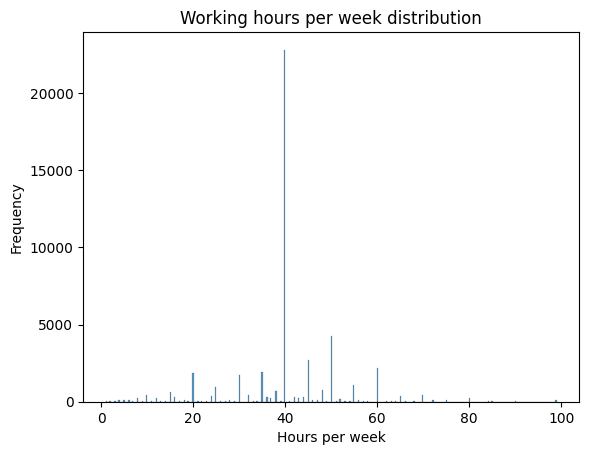

In [79]:
#Configure and display histoplot of working hours data
sns.histplot(
    data=df,
    x="hours-per-week")

plt.xlabel("Hours per week")
plt.ylabel("Frequency")
plt.title("Working hours per week distribution")
plt.show()

## Insight 2.2
**Insight:** Age of individuals follows a normal distribution centering from 20-50, representing expected working ages.

**Type of Analysis:** Univariate numerical analysis (r1)

*(Evidence, and code provided in next cell)*

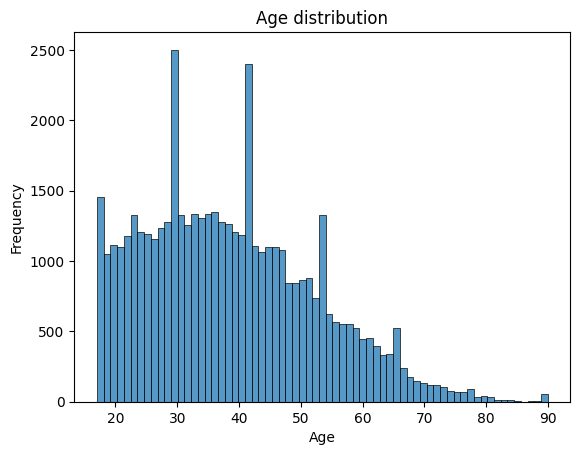

In [80]:
#Configure and display histoplot of age data
sns.histplot(
    data=df,
    x="age")

plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age distribution")
plt.show()

## Insight 2.3
**Insight:** Majority of individuals in the data set are white, disproportionally representing the race distribution of working Americans.

**Type of Analysis:** Univariate categorical analysis via Countplot (r2)

*(Evidence, and code provided in next cell)*

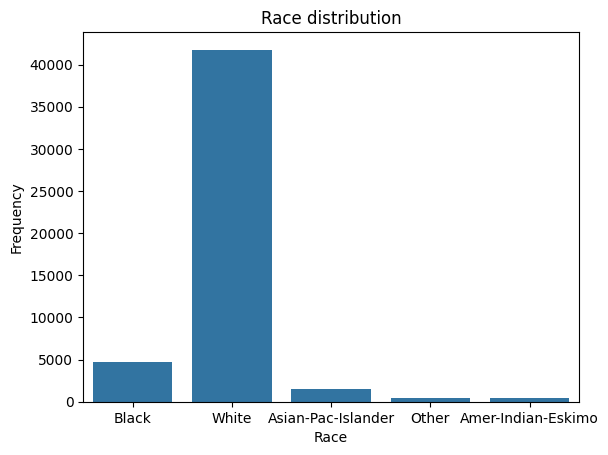

In [81]:
#Configure an display countplot distribution for races in dataset
sns.countplot(
    data=df,
    x="race")

plt.xlabel("Race")
plt.ylabel("Frequency")
plt.title("Race distribution")
plt.show()

## Insight 2.4
**Insight:** Some occupational fields have much higher representation than others, but no clear skew towards any specific categories (no strong focus on office jobs vs. trade jobs, tech vs. business etc.)

**Type of Analysis:** Univariate categorical analysis via Countplot (r2)

*(Evidence, and code provided in next cell)*

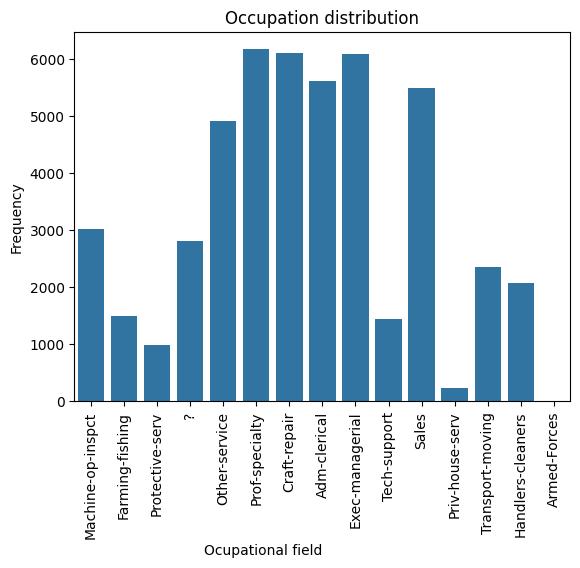

In [82]:
#Configure an display countplot distribution for occupations in dataset
sns.countplot(
    data=df,
    x="occupation")

plt.xlabel("Ocupational field", ha="right")
plt.xticks(rotation=90)
plt.ylabel("Frequency")
plt.title("Occupation distribution")
plt.show()

## Insight 2.5
**Insight:** Majority of individuals are either high-school grads or attending colledge/university. Even when grouping elementary and highschool (non-graduate) indviduals, they still are within the minority.

**Type of Analysis:** Univariate grouped-categorical analysis via Countplot (r3). The mappings were as followed:

[1st-4th, 5th-6th, 7th-8th] -> elementary

[9th, 10th, 11th, 12th] -> high school

These grouping were performed because these listed buckets were all minority buckets within the education distribution and individually, one does not gain significant certification/distinction between entries in their respective groups (e.x from an employability/salary perspective, a highest education of 1st-4th grade vs 5th-6th grade does not provide significant distinction)

*(Evidence, and code provided in next cell)*

Text(0.5, 1.0, 'Distribution of Education Levels (Grouped)')

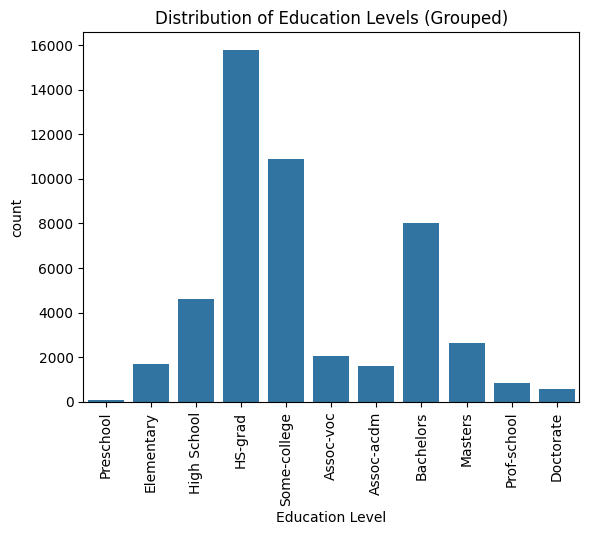

In [83]:
#Custom education groups
preschool = ["Preschool"]
elementary = ["1st-4th", "5th-6th", "7th-8th"]
highschool = ["9th", "10th", "11th", "12th"]

#Helper function to make education groupings
def map_education(edu):
    if edu in preschool:
        return "Preschool"
    elif edu in elementary:
        return "Elementary"
    elif edu in highschool:
        return "High School"
    else:
        return edu

#Perform mapping
df["education_grouped"] = df["education"].apply(map_education)

#Define sorting order
higher_edu = [edu for edu in education_order if edu not in preschool + elementary + highschool]
plot_order = ["Preschool", "Elementary", "High School"] + higher_edu

#Generate grouped CountPlot of educations
sns.countplot(
    data=df,
    x="education_grouped",
    order=plot_order
)
plt.xlabel("Education Level")
plt.xticks(rotation=90)
plt.title("Distribution of Education Levels (Grouped)")

## Insight 2.6
**Insight:** Higher level of education significantly increases the probability of earning a salary of over $50000.

**Type of Analysis:** Numerical to categorical bivariate analysis (r4)

*(Evidence, and code provided in next cell)*

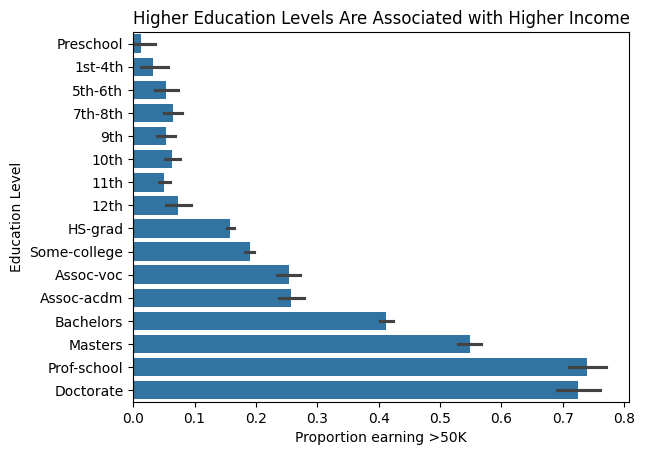

In [84]:
#Configure and display barplot
sns.barplot(
    data=df,
    y="education",
    x="income_binary",
    order=education_order
)

plt.xlabel("Proportion earning >50K")
plt.ylabel("Education Level")
plt.title("Higher Education Levels Are Associated with Higher Income")
plt.show()

## Insight 2.7
**Insight:** Family status shows association with income levels, with those who are married but do not have children being most likley to earn a salary of over $50000.

**Type of Analysis:** Bivariate categorical to categorical analysis (r5)

*(Evidence, and code provided in next cell)*

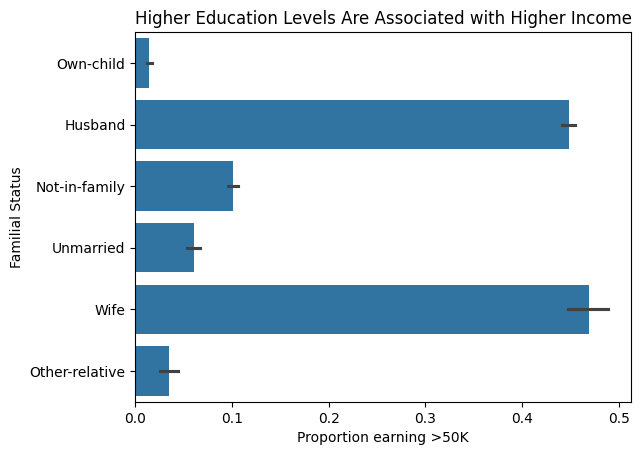

In [85]:
#Configure and display
sns.barplot(
    data=df,
    y="relationship",
    x="income_binary",
)

plt.xlabel("Proportion earning >50K")
plt.ylabel("Familial Status")
plt.title("Higher Education Levels Are Associated with Higher Income")
plt.show()

## Insight 2.8
**Insight:** Those with lower levels of education and post-graduate degrees are more likley to be older in age.

**Type of Analysis:** Bivariate analysis showing correlation between two categories, sorted by level of education (r6)

*(Evidence, and code provided in next cell)*

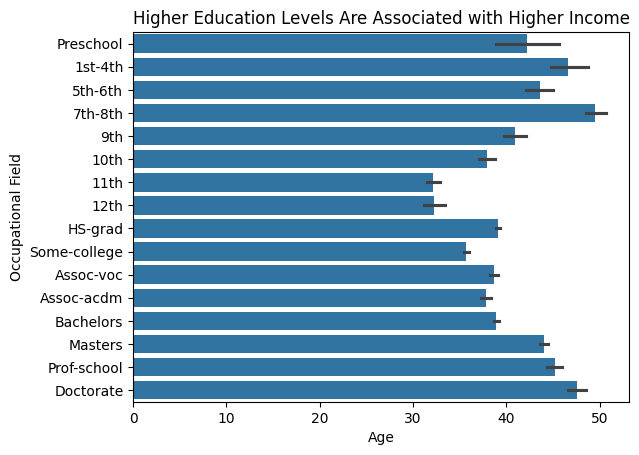

In [86]:
#Configure and display
sns.barplot(
    data=df,
    x="age",
    y="education",

    #Use earlier defined education order
    order=education_order
)

plt.xlabel("Age")
plt.ylabel("Occupational Field")
plt.title("Higher Education Levels Are Associated with Higher Income")
plt.show()

## Insight 2.9
**Insight:** Working hours greatly varies by occupational field, but trades and manual jobs are more likley to have overtime hours.

**Type of Analysis:** Bivariate analysis between catgeorical to numerical data with numerical bucketing (r7)

*(Evidence, and code provided in next cell)*

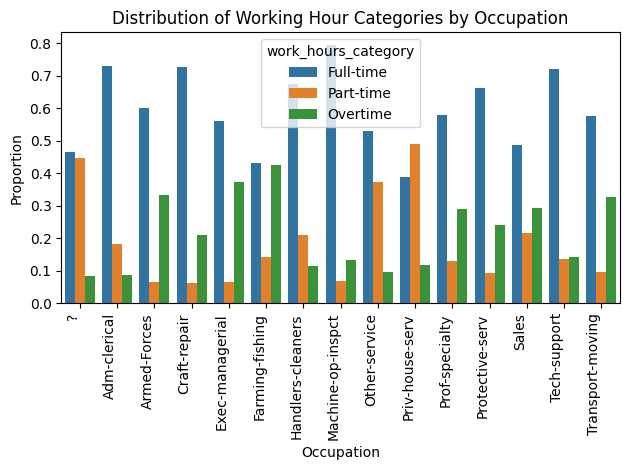

In [87]:
#Helper function to categorize working hours
def categorize_hours(hours):
    if hours < 35:
        return "Part-time"
    elif hours <= 45:
        return "Full-time"
    else:
        return "Overtime"

#Perform the bucket mapping
df["work_hours_category"] = df["hours-per-week"].apply(categorize_hours)

#Apply working hour buckets to ocupations and calculate the proportions
occupation_hours = (
    df.groupby("occupation")["work_hours_category"]
      .value_counts(normalize=True)
      .rename("proportion")
      .reset_index()
)

#Generate barplot
sns.barplot(
    data=occupation_hours,
    x="occupation",
    y="proportion",
    hue="work_hours_category"
)

plt.xticks(rotation=90, ha="right")
plt.xlabel("Occupation")
plt.ylabel("Proportion")
plt.title("Distribution of Working Hour Categories by Occupation")
plt.tight_layout()
plt.show()


## Insight 2.10
**Insight:** Age to proportion of individuals making above $50000 salary follows a normal distribution. Wage increaseing from ages >20 up to the mid-40's where it plateaus and then declines.

**Type of Analysis:** Numerical to numerical scatterplot correlation.

*(Evidence, and code provided in next cell)*

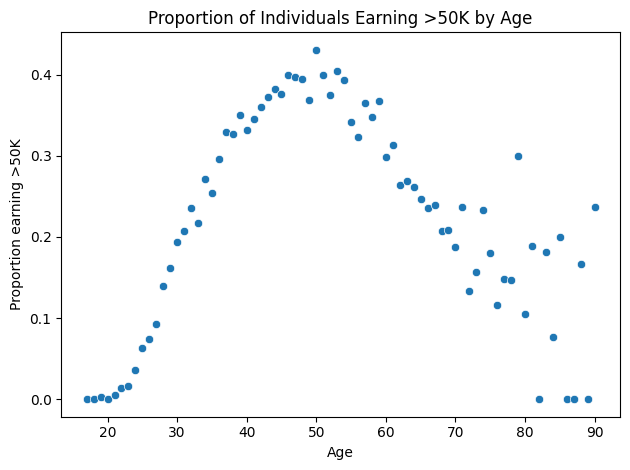

In [88]:
#group by age and compute proportion
age_income = (
    df.groupby("age")["income_binary"]
      .mean()
      .reset_index(name="proportion_over_50K")
)

#Map the scatterplot
sns.scatterplot(
    data=age_income,
    x="age",
    y="proportion_over_50K"
)

plt.xlabel("Age")
plt.ylabel("Proportion earning >50K")
plt.title("Proportion of Individuals Earning >50K by Age")
plt.tight_layout()
plt.show()

# References


*   https://seaborn.pydata.org/

